In [88]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits
from IPython.display import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['font.size'] = 20

In [ ]:
hp.rotate_alm()

# create tod

In [2]:
T = hp.read_map('../maps/T_sim.fits')
U = hp.read_map('../maps/U_sim.fits')
Q = hp.read_map('../maps/Q_sim.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


## tod
$
\begin{align}
\tau &= T + \cos(2\psi)Q + \sin(2\psi)U \\
\psi &= \frac{\pi}{2} - \alpha
\end{align}
$

use the 4 nearest neighbor interpolation from healpy

In [129]:
with open('noshift/angle.bin', 'rb') as f:
    angle  = np.fromfile(f, dtype=np.float64)
with open('noshift/theta.bin', 'rb') as f:
    t = np.fromfile(f, dtype=np.float64)
with open('noshift/phi.bin', 'rb') as f:
    p = np.fromfile(f, dtype=np.float64)

psi = np.pi/2 - angle
s_A = hp.get_interp_val(T,t,p) + np.cos(2*psi)*hp.get_interp_val(Q,t,p) + np.sin(2*psi)*hp.get_interp_val(U,t,p)
psi = np.pi - angle
s_B = hp.get_interp_val(T,t,p) + np.cos(2*psi)*hp.get_interp_val(Q,t,p) + np.sin(2*psi)*hp.get_interp_val(U,t,p)

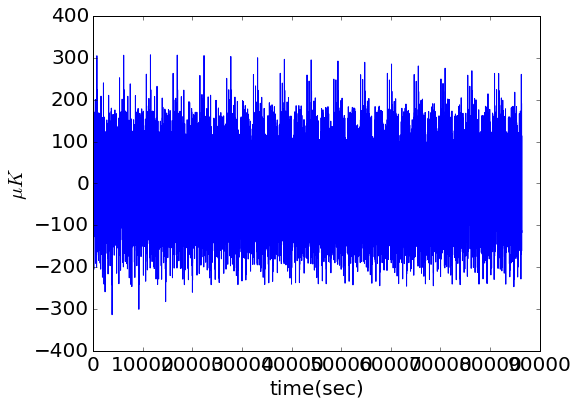

In [133]:
plt.plot(s_A)
plt.ylabel(r'$\mu K$')
plt.xlabel('time(sec)')

# check $\frac{d\theta}{dx}$, $\frac{d\theta}{dy}$,$\frac{d\phi}{dx}$, $\frac{d\phi}{dy}$ 

In [72]:
with open('shiftx/theta.bin', 'rb') as f:
    t = np.fromfile(f, dtype=np.float64)
with open('shiftx/phi.bin', 'rb') as f:
    p = np.fromfile(f, dtype=np.float64)
detang_x = np.transpose([t,p])

with open('noshift/angle.bin', 'rb') as f:
    angle  = np.fromfile(f, dtype=np.float64)
with open('noshift/theta.bin', 'rb') as f:
    t = np.fromfile(f, dtype=np.float64)
with open('noshift/phi.bin', 'rb') as f:
    p = np.fromfile(f, dtype=np.float64)
detang_n = np.transpose([t,p])

In [78]:
#34 comes from the width and angwidth setting in focalplane.py
#34 = 85(mm)/2.5(degree)
#Args:
#        width (float): physical width (in mm) between flat sides.
#        angwidth (float): the angle (in degrees) subtended by the width.
dang_dx = (detang_x - detang_n)/(0.0001/180*np.pi/34)    

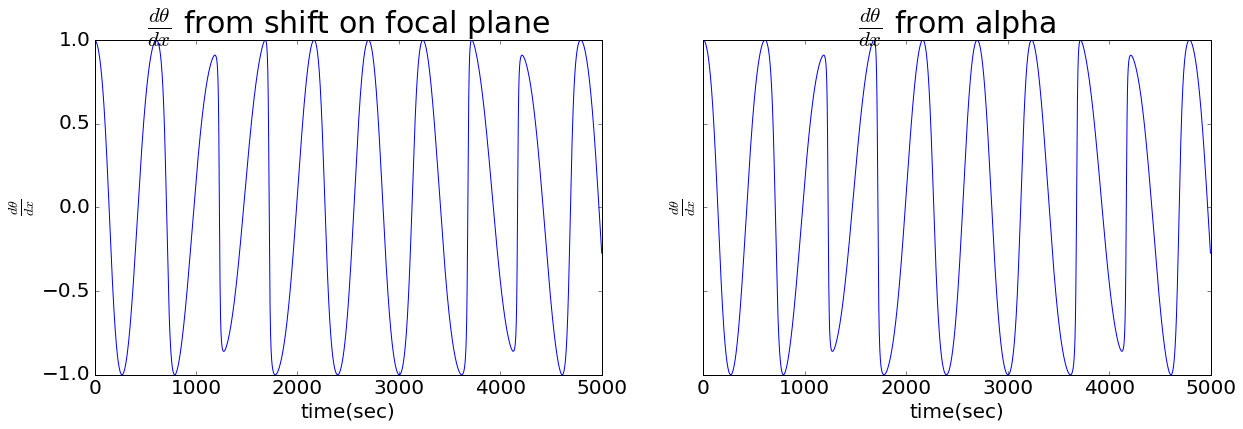

In [99]:
#plt.plot(dang_dx[:5000,0])
#plt.xlabel('time(sec)')
#plt.ylabel(r'$\frac{d\theta}{dx}$')

f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (20,6))
ax1.plot(dang_dx[:5000,0], label = 'dt_dx')
ax2.plot(-sina[:5000], label = '-sina')
ax1.set_title(r'$\frac{d\theta}{dx}$ from shift on focal plane', fontsize = 30)
ax2.set_title(r'$\frac{d\theta}{dx}$ from alpha', fontsize = 30)
ax1.set_xlabel('time(sec)')
ax2.set_xlabel('time(sec)')
ax1.set_ylabel(r'$\frac{d\theta}{dx}$')
ax2.set_ylabel(r'$\frac{d\theta}{dx}$')

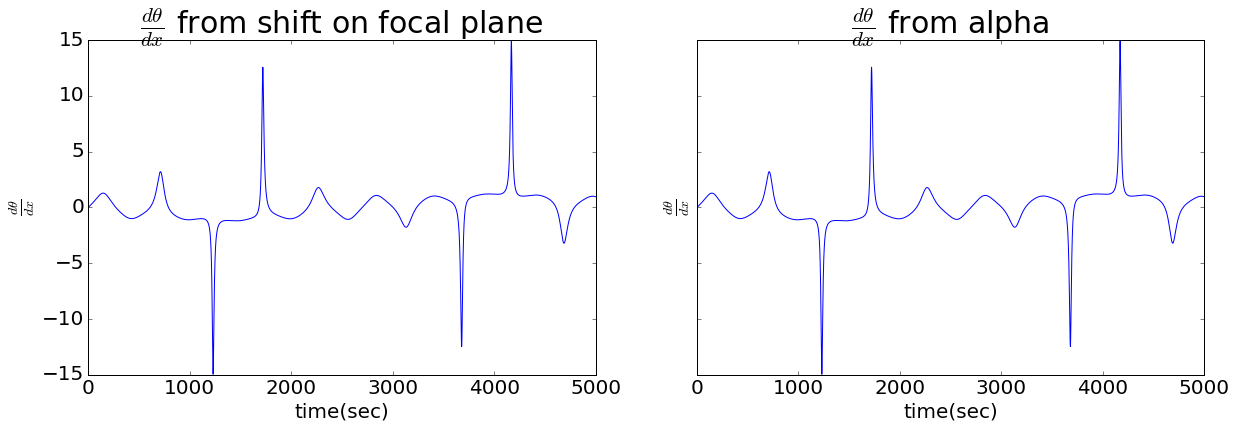

In [103]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (20,6))
ax1.plot(dang_dx[:5000,1], label = 'dt_dx')
ax2.plot((-cosa/sin_theta)[:5000], label = '-sina')
ax1.set_title(r'$\frac{d\theta}{dx}$ from shift on focal plane', fontsize = 30)
ax2.set_title(r'$\frac{d\theta}{dx}$ from alpha', fontsize = 30)
ax1.set_xlabel('time(sec)')
ax2.set_xlabel('time(sec)')
ax1.set_ylabel(r'$\frac{d\theta}{dx}$')
ax2.set_ylabel(r'$\frac{d\theta}{dx}$')

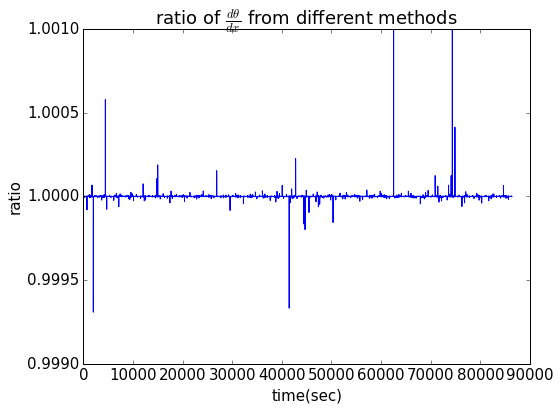

In [81]:
sina = np.sin(angle)
cosa = np.cos(angle)
sin_theta = np.sin(t)
plt.plot(-dang_dx[:,0]/sina)
plt.ylim([0.999,1.001])
plt.xlabel('time(sec)')
plt.ylabel(r'ratio')
plt.title(r'ratio of $\frac{d\theta}{dx}$ from different methods')

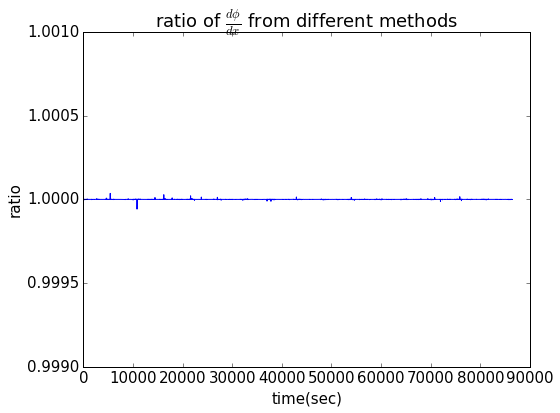

In [83]:
plt.plot((-dang_dx[:,1]/cosa*sin_theta))
plt.ylim([0.999,1.001])
plt.xlabel('time(sec)')
plt.ylabel(r'ratio')
plt.title(r'ratio of $\frac{d\phi}{dx}$ from different methods')

In [107]:
with open('shifty/theta.bin', 'rb') as f:
    t = np.fromfile(f, dtype=np.float64)
with open('shifty/phi.bin', 'rb') as f:
    p = np.fromfile(f, dtype=np.float64)
detang_y = np.transpose([t,p])

with open('noshift/angle.bin', 'rb') as f:
    angle  = np.fromfile(f, dtype=np.float64)
with open('noshift/theta.bin', 'rb') as f:
    t = np.fromfile(f, dtype=np.float64)
with open('noshift/phi.bin', 'rb') as f:
    p = np.fromfile(f, dtype=np.float64)
detang_n = np.transpose([t,p])
dang_dy = (detang_y - detang_n)/(0.001/180*np.pi/34)  

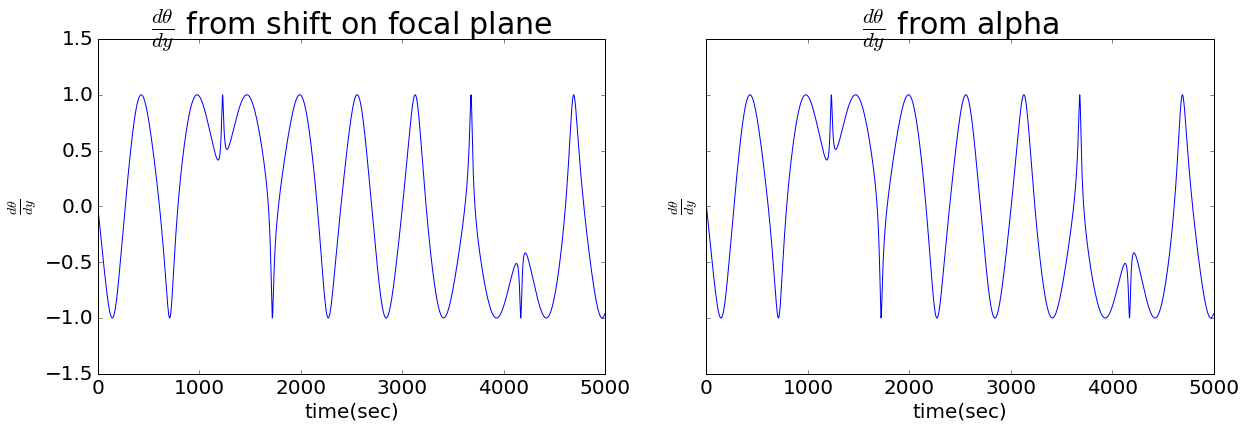

In [114]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (20,6))
ax1.plot(dang_dy[:5000,0], label = 'dt_dx')
ax2.plot(cosa[:5000], label = '-sina')
ax1.set_title(r'$\frac{d\theta}{dy}$ from shift on focal plane', fontsize = 30)
ax2.set_title(r'$\frac{d\theta}{dy}$ from alpha', fontsize = 30)
ax1.set_xlabel('time(sec)')
ax2.set_xlabel('time(sec)')
ax1.set_ylabel(r'$\frac{d\theta}{dy}$')
ax2.set_ylabel(r'$\frac{d\theta}{dy}$')

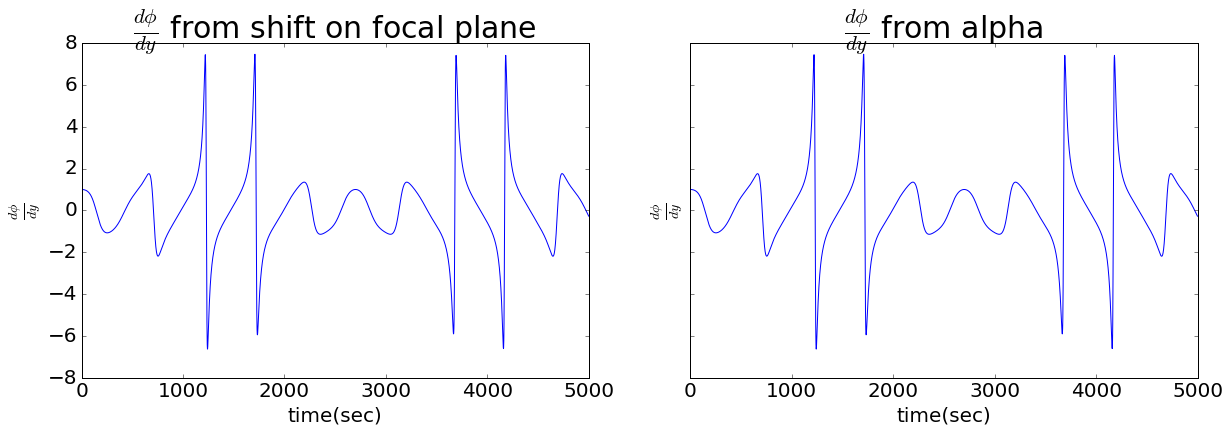

In [113]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (20,6))
ax1.plot(dang_dy[:5000,1], label = 'dt_dx')
ax2.plot((-sina/sin_theta)[:5000], label = '-sina')
ax1.set_title(r'$\frac{d\phi}{dy}$ from shift on focal plane', fontsize = 30)
ax2.set_title(r'$\frac{d\phi}{dy}$ from alpha', fontsize = 30)
ax1.set_xlabel('time(sec)')
ax2.set_xlabel('time(sec)')
ax1.set_ylabel(r'$\frac{d\phi}{dy}$')
ax2.set_ylabel(r'$\frac{d\phi}{dy}$')

# create templates

In [116]:
#import the pointing, hitmap, and angle from Toshiya's code's output
with open('pointing/pix.bin', 'rb') as f:
    detpix  = np.fromfile(f, dtype=np.int64)
with open('pointing/angle.bin', 'rb') as f:
    angle  = np.fromfile(f, dtype=np.float64)
with open('pointing/hits.bin', 'rb') as f:
    hits = np.fromfile(f, dtype=np.float64)

In [117]:
T = hp.read_map('../maps/T_sim.fits')
d_p = hp.read_map('../maps/d_p_sim.fits')
d_t = hp.read_map('../maps/d_t_sim.fits')
d_pp = hp.read_map('../maps/d_pp_sim.fits')
d_tp = hp.read_map('../maps/d_tp_sim.fits')
d_tt = hp.read_map('../maps/d_tt_sim.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


### monopole

In [118]:
mono = T[detpix]*0.01

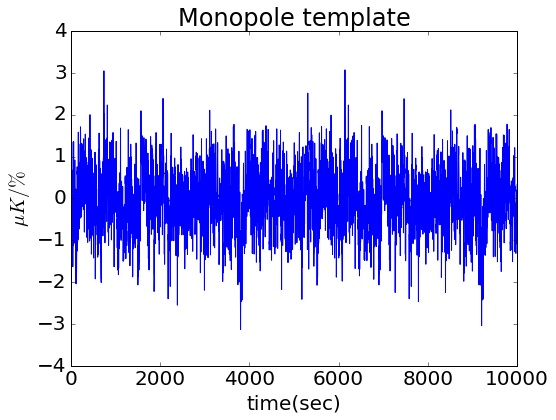

In [119]:
plt.plot(mono[:10000])
plt.title('Monopole template')
plt.xlabel('time(sec)')
plt.ylabel(r'$\mu K / \%$')

### differential pointing

In [120]:
sin_theta = np.sin(hp.pix2ang(1024,detpix)[0])
sina = np.sin(angle)
cosa = np.cos(angle)
pointing_x = (-sina*d_t[detpix] + -cosa*d_p[detpix]/sin_theta)/(180*60)*np.pi
pointing_y = (cosa*d_t[detpix] - sina*d_p[detpix]/sin_theta)/(180*60)*np.pi

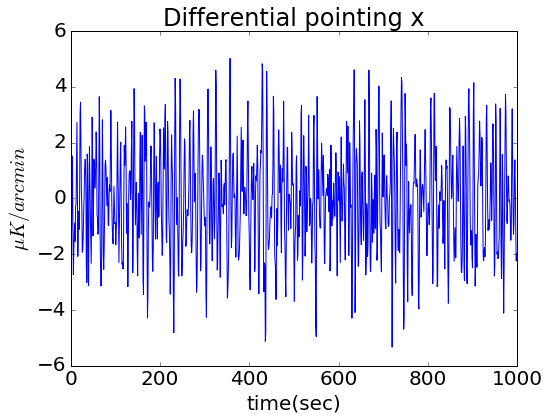

In [121]:
plt.plot(pointing_x[:1000])
plt.title('Differential pointing x')
plt.xlabel('time(sec)')
plt.ylabel(r'$\mu K / arcmin$')

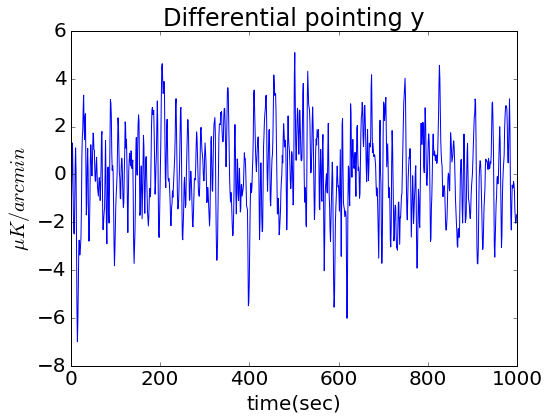

In [122]:
plt.plot(pointing_y[:1000])
plt.title('Differential pointing y')
plt.xlabel('time(sec)')
plt.ylabel(r'$\mu K / arcmin$')

### beamwidth and ellipticity

In [123]:
d2T_dxx = sina**2*d_tt[detpix] + 2*sina*cosa/sin_theta*d_tp[detpix] + cosa**2/ sin_theta**2*d_pp[detpix]
d2T_dyy = cosa**2*d_tt[detpix] - 2*sina*cosa/sin_theta*d_tp[detpix] + sina**2/ sin_theta**2*d_pp[detpix]

In [124]:
beamwidth = (d2T_dxx + d2T_dyy)/(180*60)*np.pi/(180*60)*np.pi
ellip = (d2T_dxx - d2T_dyy)/(180*60)*np.pi/(180*60)*np.pi

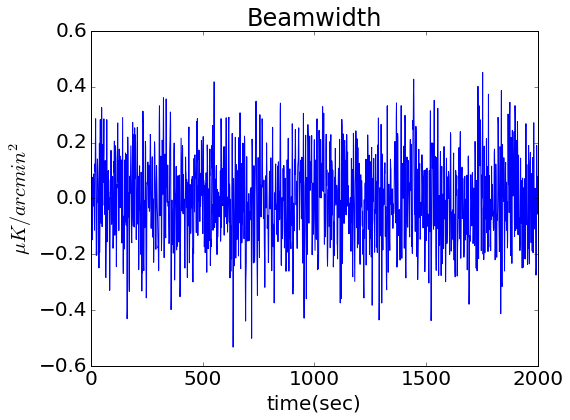

In [125]:
plt.plot(beamwidth[:2000])
plt.title('Beamwidth')
plt.xlabel('time(sec)')
plt.ylabel(r'$\mu K / arcmin^2$')

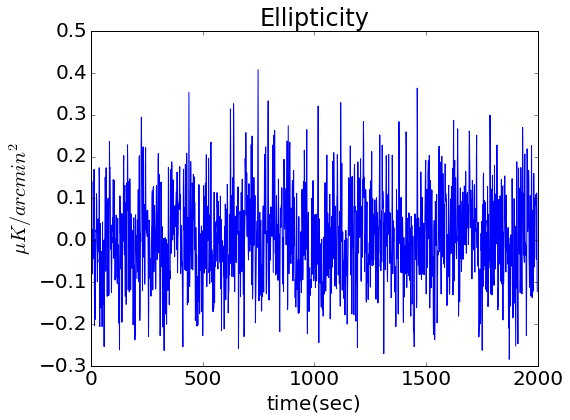

In [126]:
plt.plot(ellip[:2000])
plt.title('Ellipticity')
plt.xlabel('time(sec)')
plt.ylabel(r'$\mu K / arcmin^2$')